# Team Game Stats Deep Dive

## Importing and Describing Data

In [64]:
# Importing base packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#===================
# PCA packages for Feature Reduction
#===================
from sklearn.decomposition import PCA as pca
from sklearn import preprocessing

#===================
# Logistic Regression Model - to predit wins/loss
#===================
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Alternative model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
#===================
# Linear Regression Packages (to predict points scored)
#===================

#For QQ Plot
import scipy.stats as sts

#Correlation p-values
from scipy.stats import pearsonr

#Regression output
from sklearn.linear_model import LinearRegression

#===================
# Decision Tree Packages (to predict win/loss)
#===================

from sklearn import tree
from sklearn import metrics


In [31]:

# Reading in data
os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/clean')

df = pd.read_csv('team_game_stats_data_2022_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   game_id               3150 non-null   int64  
 1   school                3150 non-null   object 
 2   conference            3128 non-null   object 
 3   homeAway              3150 non-null   object 
 4   points                3150 non-null   int64  
 5   completionAttempts    3148 non-null   object 
 6   defensiveTDs          1765 non-null   float64
 7   firstDowns            3148 non-null   float64
 8   fourthDownEff         3148 non-null   object 
 9   fumblesLost           3148 non-null   float64
 10  fumblesRecovered      3148 non-null   float64
 11  interceptionTDs       1753 non-null   float64
 12  interceptionYards     1753 non-null   float64
 13  interceptions         3148 non-null   float64
 14  kickReturnTDs         2734 non-null   float64
 15  kickReturnYards      

In [32]:
df_num = df.select_dtypes(include= np.number)
df_num

,game_id,points,defensiveTDs,firstDowns,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,...,fourthEffpct,possession_min_temp,possession_sec_temp,possessionTime_sec,third_success,third_attempts,thirdDownEffpct,penalty_flags,penalty_yards,win_loss
0,401403853,10,0.0,20.0,2.0,0.0,NaN,NaN,0.0,0.0,...,0.000000,28.0,57.0,1737.0,5.0,16.0,0.312500,8.0,72.0,0
1,401403854,55,0.0,30.0,0.0,0.0,NaN,NaN,1.0,0.0,...,NaN,31.0,51.0,1911.0,6.0,10.0,0.600000,6.0,40.0,0
2,401403855,31,0.0,23.0,1.0,2.0,0.0,51.0,0.0,0.0,...,NaN,28.0,36.0,1716.0,8.0,16.0,0.500000,7.0,63.0,0
3,401403856,42,0.0,22.0,0.0,0.0,NaN,NaN,2.0,0.0,...,0.500000,27.0,57.0,1677.0,4.0,8.0,0.500000,3.0,20.0,1
4,401403857,29,0.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,27.0,43.0,1663.0,7.0,12.0,0.583333,7.0,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,401507088,3,0.0,14.0,0.0,2.0,NaN,NaN,0.0,0.0,...,0.333333,40.0,9.0,2409.0,3.0,19.0,0.157895,7.0,40.0,0
3146,401508850,32,NaN,28.0,2.0,0.0,NaN,NaN,1.0,0.0,...,0.250000,28.0,47.0,1727.0,6.0,15.0,0.400000,6.0,58.0,0
3147,401508851,18,NaN,15.0,0.0,0.0,NaN,NaN,0.0,0.0,...,0.666667,27.0,12.0,1632.0,3.0,11.0,0.272727,4.0,20.0,0
3148,401508870,14,NaN,14.0,0.0,1.0,NaN,NaN,1.0,0.0,...,0.500000,22.0,51.0,1371.0,1.0,11.0,0.090909,3.0,25.0,0


In [33]:
df_num.columns

Index(['game_id', 'points', 'defensiveTDs', 'firstDowns', 'fumblesLost',
       'fumblesRecovered', 'interceptionTDs', 'interceptionYards',
       'interceptions', 'kickReturnTDs', 'kickReturnYards', 'kickReturns',
       'kickingPoints', 'netPassingYards', 'passesDeflected',
       'passesIntercepted', 'passingTDs', 'puntReturnTDs', 'puntReturnYards',
       'puntReturns', 'qbHurries', 'rushingAttempts', 'rushingTDs',
       'rushingYards', 'sacks', 'tackles', 'tacklesForLoss', 'totalFumbles',
       'totalYards', 'turnovers', 'yardsPerPass', 'yardsPerRushAttempt',
       'completions', 'attempts', 'completionPercentage', 'fourth_success',
       'fourth_attempts', 'fourthEffpct', 'possession_min_temp',
       'possession_sec_temp', 'possessionTime_sec', 'third_success',
       'third_attempts', 'thirdDownEffpct', 'penalty_flags', 'penalty_yards',
       'win_loss'],
      dtype='object')

In [34]:
df_sub = df_num.loc[:, ~df_num.columns.isin(['game_id'])]
df_sub

,points,defensiveTDs,firstDowns,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,kickReturnYards,...,fourthEffpct,possession_min_temp,possession_sec_temp,possessionTime_sec,third_success,third_attempts,thirdDownEffpct,penalty_flags,penalty_yards,win_loss
0,10,0.0,20.0,2.0,0.0,NaN,NaN,0.0,0.0,89.0,...,0.000000,28.0,57.0,1737.0,5.0,16.0,0.312500,8.0,72.0,0
1,55,0.0,30.0,0.0,0.0,NaN,NaN,1.0,0.0,18.0,...,NaN,31.0,51.0,1911.0,6.0,10.0,0.600000,6.0,40.0,0
2,31,0.0,23.0,1.0,2.0,0.0,51.0,0.0,0.0,16.0,...,NaN,28.0,36.0,1716.0,8.0,16.0,0.500000,7.0,63.0,0
3,42,0.0,22.0,0.0,0.0,NaN,NaN,2.0,0.0,23.0,...,0.500000,27.0,57.0,1677.0,4.0,8.0,0.500000,3.0,20.0,1
4,29,0.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,81.0,...,1.000000,27.0,43.0,1663.0,7.0,12.0,0.583333,7.0,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3,0.0,14.0,0.0,2.0,NaN,NaN,0.0,0.0,71.0,...,0.333333,40.0,9.0,2409.0,3.0,19.0,0.157895,7.0,40.0,0
3146,32,NaN,28.0,2.0,0.0,NaN,NaN,1.0,0.0,78.0,...,0.250000,28.0,47.0,1727.0,6.0,15.0,0.400000,6.0,58.0,0
3147,18,NaN,15.0,0.0,0.0,NaN,NaN,0.0,0.0,168.0,...,0.666667,27.0,12.0,1632.0,3.0,11.0,0.272727,4.0,20.0,0
3148,14,NaN,14.0,0.0,1.0,NaN,NaN,1.0,0.0,30.0,...,0.500000,22.0,51.0,1371.0,1.0,11.0,0.090909,3.0,25.0,0


## Running PCA

In [35]:
df_pca = df_sub.dropna()

In [36]:
# Scalling the data (not necessary for these data, but provided as an example)
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df_pca)
# Since data have different scaling need to run this (46 components since there are 46 variables)
pca_result = pca(n_components=46).fit(df_pca)

#Obtain eigenvalues (will only pick those values > 1 to keep)
pca_result.explained_variance_

# 26 values are > 1... so our model can have up to 26 values... need to check plot

array([6.92736987e+04, 1.66037074e+04, 8.91107953e+03, 1.21273383e+03,
       7.51109711e+02, 6.25286551e+02, 6.07454479e+02, 2.88684145e+02,
       9.66085602e+01, 8.82651737e+01, 4.91860154e+01, 2.63872139e+01,
       9.74592877e+00, 8.75254029e+00, 7.36311443e+00, 6.30498069e+00,
       5.29769550e+00, 4.63953733e+00, 3.98671137e+00, 2.53073082e+00,
       2.22551070e+00, 1.74533708e+00, 1.53727619e+00, 1.40497069e+00,
       1.23410485e+00, 1.06785953e+00, 8.97709693e-01, 7.58848267e-01,
       5.85350502e-01, 4.80571180e-01, 3.83944429e-01, 3.58986654e-01,
       2.98644730e-01, 2.37794567e-01, 1.78440072e-01, 1.50311471e-01,
       5.16875852e-02, 3.01053851e-02, 2.77626667e-02, 1.34787107e-02,
       1.75161632e-03, 1.52673266e-03, 8.91369859e-04, 3.71760799e-28,
       2.95942878e-28, 2.95942878e-28])

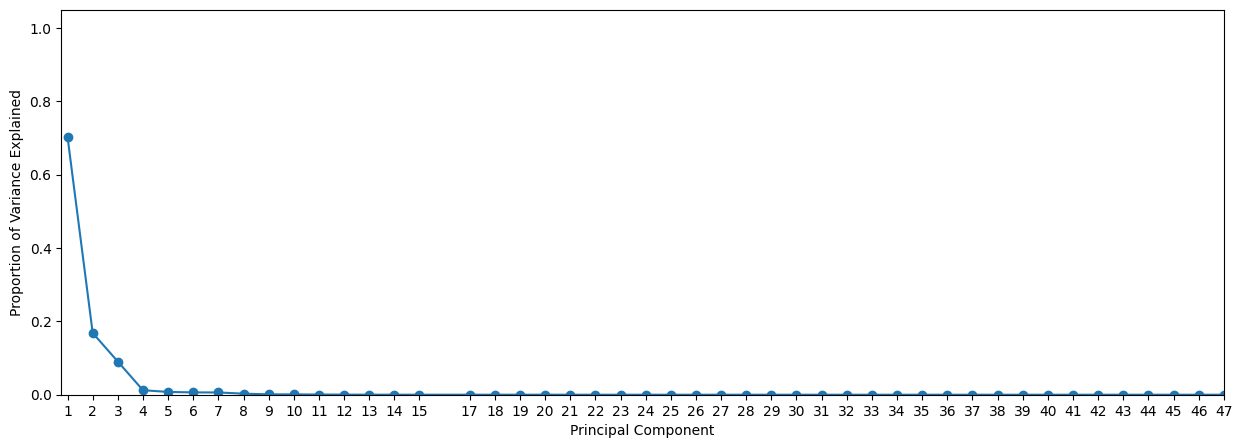

In [37]:
# Creating a screeplot
# Run this group of code together by highlighting it
# all and then running it
plt.figure(figsize=(15,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47])

plt.show()

# Plot shows that ther are really only 4 values needed

## Create a Logistic Regression Model

In [38]:
# Remove points
df_pca

,points,defensiveTDs,firstDowns,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,kickReturnYards,...,fourthEffpct,possession_min_temp,possession_sec_temp,possessionTime_sec,third_success,third_attempts,thirdDownEffpct,penalty_flags,penalty_yards,win_loss
15,44,0.0,28.0,0.0,2.0,0.0,0.0,0.0,0.0,34.0,...,0.666667,34.0,37.0,2077.0,9.0,16.0,0.562500,10.0,122.0,1
17,16,0.0,12.0,0.0,0.0,0.0,0.0,2.0,0.0,70.0,...,0.333333,26.0,36.0,1596.0,4.0,16.0,0.250000,3.0,28.0,0
19,65,1.0,23.0,0.0,8.0,1.0,29.0,2.0,0.0,18.0,...,0.000000,31.0,14.0,1874.0,7.0,12.0,0.583333,6.0,40.0,1
20,59,0.0,25.0,0.0,4.0,0.0,4.0,1.0,0.0,38.0,...,0.000000,23.0,44.0,1424.0,3.0,8.0,0.375000,9.0,79.0,1
22,40,1.0,18.0,1.0,0.0,0.0,3.0,0.0,0.0,24.0,...,1.000000,32.0,1.0,1921.0,4.0,13.0,0.307692,8.0,68.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,24,0.0,21.0,1.0,0.0,0.0,21.0,1.0,0.0,127.0,...,1.000000,37.0,48.0,2268.0,4.0,14.0,0.285714,2.0,20.0,1
3083,16,0.0,17.0,0.0,0.0,0.0,2.0,2.0,0.0,32.0,...,0.000000,35.0,32.0,2132.0,10.0,21.0,0.476190,8.0,60.0,1
3084,45,0.0,27.0,0.0,1.0,0.0,0.0,3.0,0.0,18.0,...,1.000000,36.0,19.0,2179.0,11.0,19.0,0.578947,4.0,40.0,1
3085,24,0.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,38.0,...,0.000000,38.0,10.0,2290.0,11.0,17.0,0.647059,8.0,55.0,0


In [39]:
df_pca.columns

Index(['points', 'defensiveTDs', 'firstDowns', 'fumblesLost',
       'fumblesRecovered', 'interceptionTDs', 'interceptionYards',
       'interceptions', 'kickReturnTDs', 'kickReturnYards', 'kickReturns',
       'kickingPoints', 'netPassingYards', 'passesDeflected',
       'passesIntercepted', 'passingTDs', 'puntReturnTDs', 'puntReturnYards',
       'puntReturns', 'qbHurries', 'rushingAttempts', 'rushingTDs',
       'rushingYards', 'sacks', 'tackles', 'tacklesForLoss', 'totalFumbles',
       'totalYards', 'turnovers', 'yardsPerPass', 'yardsPerRushAttempt',
       'completions', 'attempts', 'completionPercentage', 'fourth_success',
       'fourth_attempts', 'fourthEffpct', 'possession_min_temp',
       'possession_sec_temp', 'possessionTime_sec', 'third_success',
       'third_attempts', 'thirdDownEffpct', 'penalty_flags', 'penalty_yards',
       'win_loss'],
      dtype='object')

In [40]:
df_sub[['possession_min_temp', 'possession_sec_temp', 'possessionTime_sec']]

,possession_min_temp,possession_sec_temp,possessionTime_sec
0,28.0,57.0,1737.0
1,31.0,51.0,1911.0
2,28.0,36.0,1716.0
3,27.0,57.0,1677.0
4,27.0,43.0,1663.0
...,...,...,...
3145,40.0,9.0,2409.0
3146,28.0,47.0,1727.0
3147,27.0,12.0,1632.0
3148,22.0,51.0,1371.0


In [41]:
# Removing points at this will always determine if sombody wins or loses
df_lr = df_pca.loc[:, ~df_pca.columns.isin(['points', 'possession_min_temp', 'possession_sec_temp'])]

In [42]:
df_lr.columns

Index(['defensiveTDs', 'firstDowns', 'fumblesLost', 'fumblesRecovered',
       'interceptionTDs', 'interceptionYards', 'interceptions',
       'kickReturnTDs', 'kickReturnYards', 'kickReturns', 'kickingPoints',
       'netPassingYards', 'passesDeflected', 'passesIntercepted', 'passingTDs',
       'puntReturnTDs', 'puntReturnYards', 'puntReturns', 'qbHurries',
       'rushingAttempts', 'rushingTDs', 'rushingYards', 'sacks', 'tackles',
       'tacklesForLoss', 'totalFumbles', 'totalYards', 'turnovers',
       'yardsPerPass', 'yardsPerRushAttempt', 'completions', 'attempts',
       'completionPercentage', 'fourth_success', 'fourth_attempts',
       'fourthEffpct', 'possessionTime_sec', 'third_success', 'third_attempts',
       'thirdDownEffpct', 'penalty_flags', 'penalty_yards', 'win_loss'],
      dtype='object')

### Create Train and Validation Split

In [43]:
# Split into Training and Test
features = ['defensiveTDs', 'firstDowns', 'fumblesLost', 'fumblesRecovered',
       'interceptionTDs', 'interceptionYards', 'interceptions',
       'kickReturnTDs', 'kickReturnYards', 'kickReturns', 'kickingPoints',
       'netPassingYards', 'passesDeflected', 'passesIntercepted', 'passingTDs',
       'puntReturnTDs', 'puntReturnYards', 'puntReturns', 'qbHurries',
       'rushingAttempts', 'rushingTDs', 'rushingYards', 'sacks', 'tackles',
       'tacklesForLoss', 'totalFumbles', 'totalYards', 'turnovers',
       'yardsPerPass', 'yardsPerRushAttempt', 'completions', 'attempts',
       'completionPercentage', 'fourth_success', 'fourth_attempts',
       'fourthEffpct', 'possessionTime_sec', 'third_success', 'third_attempts',
       'thirdDownEffpct', 'penalty_flags', 'penalty_yards']

X = df_lr.loc[:,features]
y = df_lr.loc[:,['win_loss']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

## Create Logistic Regression Model

In [72]:
# Creating instance of model
logreg1 = LogisticRegression()

In [73]:
logreg1.fit(X_train, y_train)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
y_predlr = logreg1.predict(X_test)

In [75]:
# Scoring mode - (result - 58% accuracy)
logreg1.score(X_test, y_test)

0.5818181818181818

## Scaling Data then Running Logistic Regression

In [76]:
# Initiating scaler
scaler = StandardScaler()

In [77]:
# Scaling data
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [78]:
# Fitting model
logreg1.fit(X_train_s, y_train)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [79]:
# Predict values
y_predlr2 = logreg1.predict(X_test_s)

In [80]:
# Getting score log logistic regression (Slight improvement)
logreg1.score(X_test_s, y_test)

0.5909090909090909

## Running Logistic Regression Another Way

In [81]:
# Run the logistic regression (insignificant model)
logreg2 = smf.logit('win_loss ~ defensiveTDs + firstDowns + fumblesLost + fumblesRecovered + interceptionTDs + interceptionYards + interceptions + kickReturnTDs + kickReturnYards + kickReturns + kickingPoints + netPassingYards + passesDeflected + passesIntercepted + passingTDs + puntReturnTDs + puntReturnYards + puntReturns + qbHurries + rushingAttempts + rushingTDs + rushingYards + sacks + tackles + tacklesForLoss + totalFumbles + totalYards + turnovers + yardsPerPass + yardsPerRushAttempt + completions + attempts + completionPercentage + fourth_success + fourth_attempts + fourthEffpct  + possessionTime_sec + third_success + third_attempts + thirdDownEffpct + penalty_flags + penalty_yards', df_lr).fit()
logreg2.summary()

         Current function value: 0.531409
         Iterations: 35


/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               win_loss   No. Observations:                  365
Model:                          Logit   Df Residuals:                      323
Method:                           MLE   Df Model:                           41
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.2328
Time:                        11:19:35   Log-Likelihood:                -193.96
converged:                      False   LL-Null:                       -252.83
Covariance Type:            nonrobust   LLR p-value:                 2.416e-09
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.9040      2.949      0.646      0.519      -3.876       7.684
defensiveTDs            -0.7932      1.932     -0.410      0.681      -4.581       2.994
firstDowns               0.0509      0.071      0.717      0.473      -0.088       0.190
fumblesLost             -0.2363   2.66e+06   -8.9e-08      1.000    -5.2e+06     5.2e+06
fumblesRecovered         0.0278      0.097      0.286      0.775      -0.163       0.219
interceptionTDs          1.4031      1.967      0.713      0.476      -2.453       5.259
interceptionYards       -0.0015      0.007     -0.210      0.833      -0.016       0.013
interceptions            0.1884   2.66e+06    7.1e-08      1.000    -5.2e+06     5.2e+06
kickReturnTDs            1.1965      2.192      0.546      0.585      -3.099       5.492
kickReturnYards          0.0096      0.007      1.337      0.181      -0.004       0.024
kickReturns             -0.4441      0.178     -2.489      0.013      -0.794      -0.094
kickingPoints            0.0401      0.051      0.789      0.430      -0.060       0.140
netPassingYards         -0.0056      0.017     -0.329      0.742      -0.039       0.028
passesDeflected          0.1142      0.058      1.981      0.048       0.001       0.227
passesIntercepted        0.1806      0.197      0.917      0.359      -0.206       0.567
passingTDs               0.2757      0.154      1.788      0.074      -0.026       0.578
puntReturnTDs            0.4191      2.150      0.195      0.845      -3.795       4.634
puntReturnYards          0.0038      0.009      0.419      0.675      -0.014       0.022
puntReturns              0.1913      0.148      1.291      0.197      -0.099       0.482
qbHurries               -0.0230      0.053     -0.433      0.665      -0.127       0.081
rushingAttempts         -0.0615      0.063     -0.969      0.333      -0.186       0.063
rushingTDs               0.4921      0.160      3.077      0.002       0.179       0.805
rushingYards             0.0038      0.017      0.222      0.825      -0.030       0.038
sacks                    0.1022      0.103      0.988      0.323      -0.101       0.305
tackles                 -0.0206      0.014     -1.496      0.135      -0.048       0.006
tacklesForLoss           0.0850      0.064      1.335      0.182      -0.040       0.210
totalFumbles            -0.3022      0.166     -1.821      0.069      -0.627       0.023
totalYards              -0.0025      0.017     -0.145      0.885      -0.036       0.031
turnovers               -0.0478   2.66e+06   -1.8e-08      1.000    -5.2e+06     5.2e+06
yardsPerPass             0.2039      0.228      0.895      0.371      -0.243       0.650
yardsPerRushAttempt     -0.1305      0.357     -0.366      0.715      -0.830       0.569
completions              0.0378      0.113      0.336      0.737      -0.183       0.259
attempts                -0.0269      0.066     -0.408      0.683      -0.156       0.102
completionPercentage    -4.4145      

In [83]:
# Eliminating Non-Significant Features into a New Model

In [90]:
# Split into Training and Test
# Keeping features with a Z-score < 0.5 (not 0.05)
features2 = ['firstDowns','interceptionTDs', 'kickReturnYards', 'kickReturns', 'kickingPoints','passesDeflected', 'passesIntercepted', 'passingTDs',
              'puntReturns', 'rushingAttempts', 'rushingTDs', 'sacks', 'tackles','tacklesForLoss', 'totalFumbles','yardsPerPass', 'completionPercentage', 
              'fourth_attempts','fourthEffpct', 'penalty_flags', 'penalty_yards']

X2 = df_lr.loc[:,features2]
y2 = df_lr.loc[:,['win_loss']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0, train_size = .70)

In [91]:
# Scaling data
X_train_s2 = scaler.fit_transform(X_train2)
X_test_s2 = scaler.transform(X_test2)

In [92]:
# Fitting model
logreg1.fit(X_train_s2, y_train2)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [93]:
# Predict values
y_predlr3 = logreg1.predict(X_test_s2)

In [94]:
# Getting score log logistic regression (Very Slight Improvement 0.59 > 0.60)
logreg1.score(X_test_s2, y_test2)

0.6

# Decision Tree Model

In [156]:
# Adding in a string column to train and test win_loss
def win_loss(value):
    if value == 1:
        return "win"
    elif value == 0:
        return "loss"

y_train['win_loss_s'] = y_train['win_loss'].map(win_loss)
y_test['win_loss_s'] = y_test['win_loss'].map(win_loss)

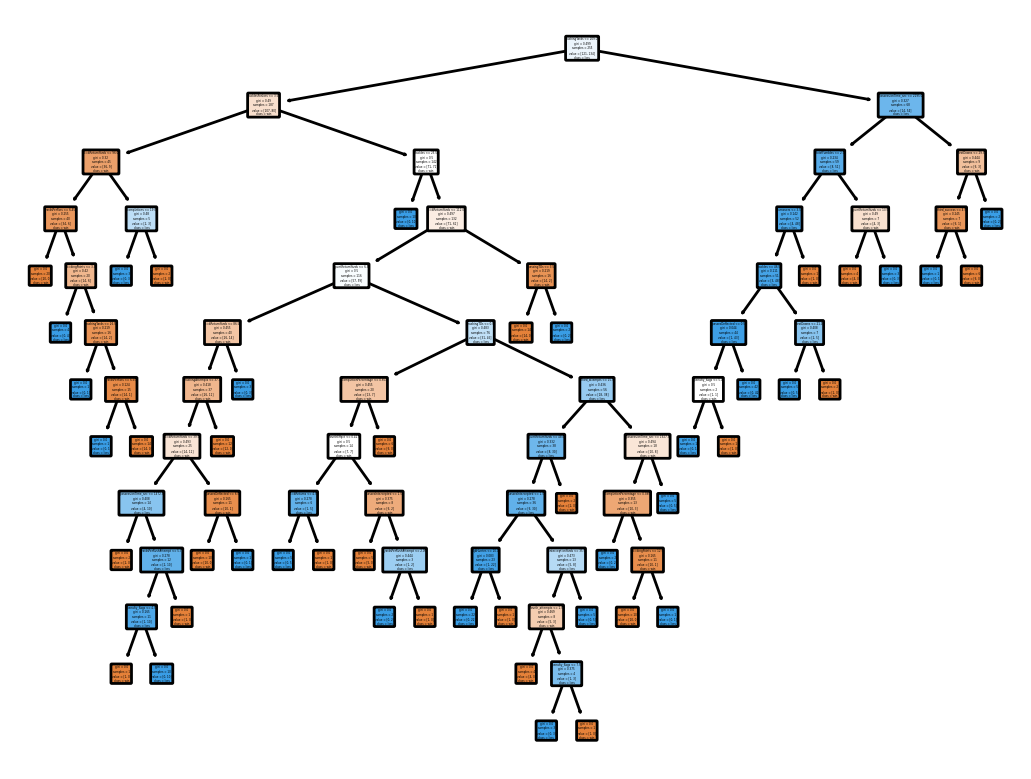

In [159]:
# Creating decision tree
col_names = list(X_train.columns)
classnames = list(y_train.win_loss_s.unique())

# Creating a decision tree using the original, unscaled data
tre1 = tree.DecisionTreeClassifier().fit(X_train,y_train.win_loss_s)

# Plotting the tree
tree.plot_tree(tre1,feature_names=col_names,class_names=classnames,filled=True,rounded=True)
plt.show()

In [160]:
# Accessing Accuracy of First Decision Tree
predicted = tre1.predict(X_test)

print(metrics.classification_report(y_test.win_loss_s, predicted))

# Confusion Matrix
cm = metrics.confusion_matrix(y_test.win_loss_s, predicted)
print(cm)

              precision    recall  f1-score   support

        loss       0.52      0.57      0.54        56
         win       0.50      0.44      0.47        54

    accuracy                           0.51       110
   macro avg       0.51      0.51      0.51       110
weighted avg       0.51      0.51      0.51       110

[[32 24]
 [30 24]]


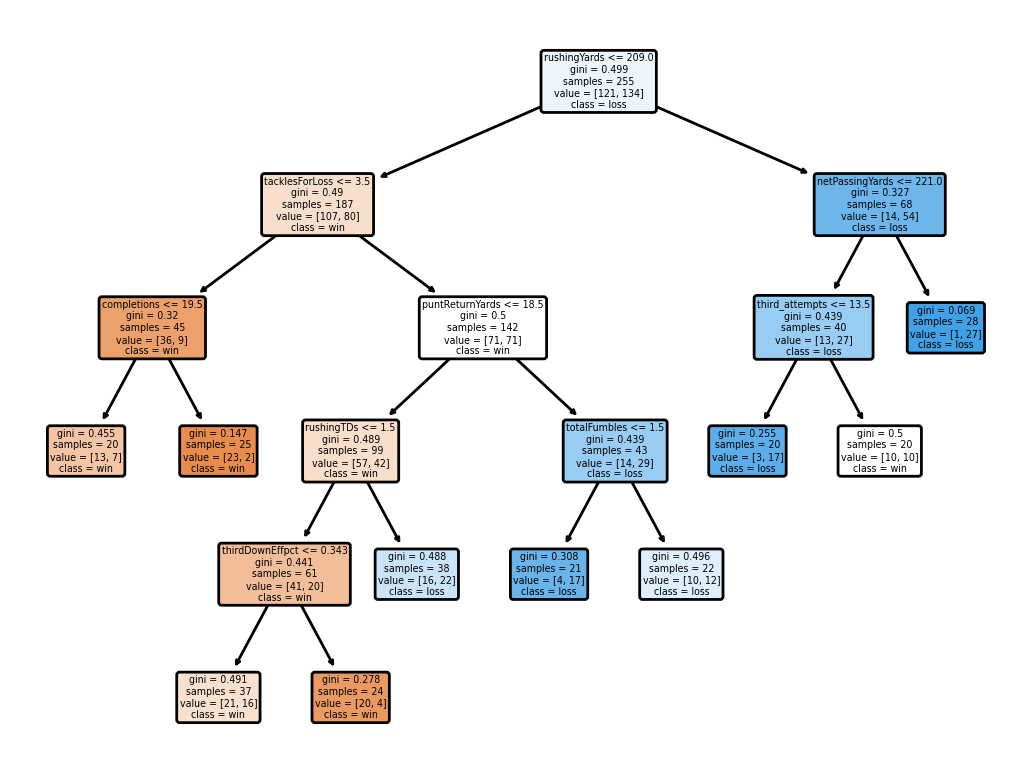

In [161]:
# Pruning the decision tree
tre3 = tree.DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=20).fit(X_train,y_train.win_loss_s)
tree.plot_tree(tre3,feature_names=col_names,class_names=classnames,filled=True,rounded=True)
plt.show()

In [124]:
# Changing default settings of the dpi for plots using plt
plt.rcParams['figure.dpi'] = 200

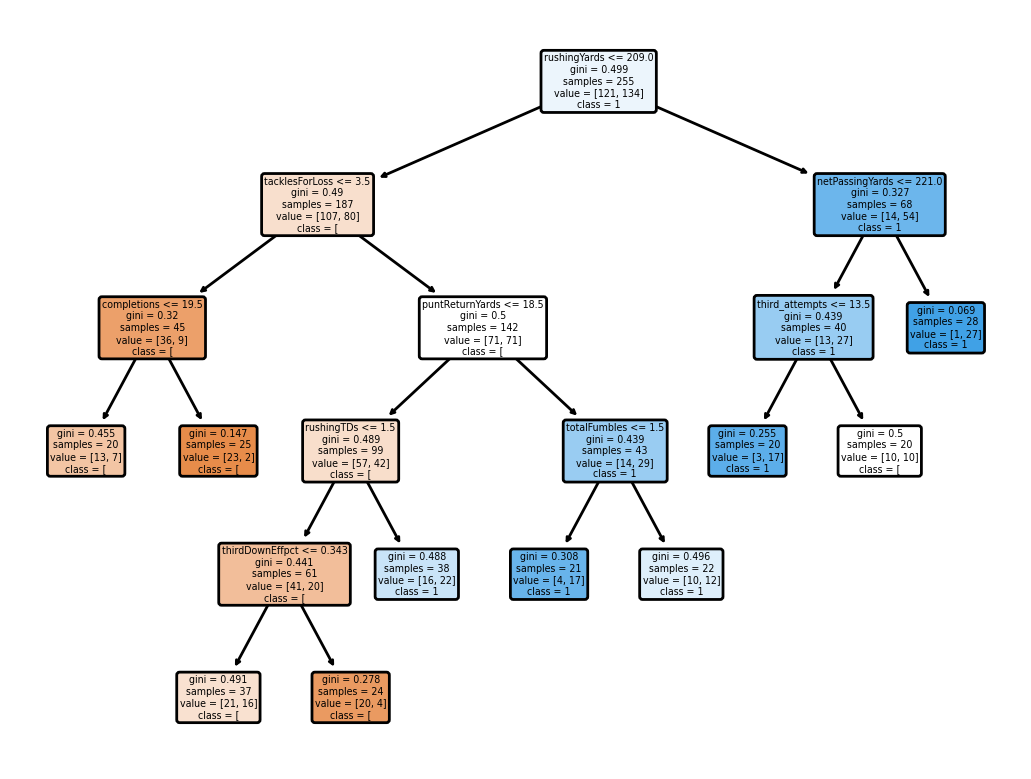

In [125]:
# Pruning the decision tree
tre3 = tree.DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=20).fit(X_train,y_train.win_loss)
tree.plot_tree(tre3,feature_names=col_names,class_names=classnames,filled=True,rounded=True)
plt.show()

In [162]:
df.sort_values(by='game_id')

,game_id,school,conference,homeAway,points,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,...,fourthEffpct,possession_min_temp,possession_sec_temp,possessionTime_sec,third_success,third_attempts,thirdDownEffpct,penalty_flags,penalty_yards,win_loss
0,401403853,Hawai'i,Mountain West,home,10,28-55,0.0,20.0,0-4,2.0,...,0.000000,28.0,57.0,1737.0,5.0,16.0,0.312500,8.0,72.0,0
1575,401403853,Vanderbilt,SEC,away,63,16-28,0.0,28.0,1-5,0.0,...,0.200000,31.0,3.0,1863.0,5.0,11.0,0.454545,5.0,60.0,1
1,401403854,Alabama,SEC,home,55,27-40,0.0,30.0,0-0,0.0,...,NaN,31.0,51.0,1911.0,6.0,10.0,0.600000,6.0,40.0,0
1576,401403854,Utah State,Mountain West,away,0,8-22,0.0,7.0,2-4,0.0,...,0.500000,28.0,9.0,1689.0,3.0,17.0,0.176471,11.0,110.0,1
2,401403855,Arkansas,SEC,home,31,18-26,0.0,23.0,0-0,1.0,...,NaN,28.0,36.0,1716.0,8.0,16.0,0.500000,7.0,63.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,401508851,South Dakota State,MVFC,home,39,11-16,NaN,21.0,1-1,0.0,...,1.000000,28.0,18.0,1698.0,4.0,8.0,0.500000,3.0,20.0,1
3148,401508870,Colorado Mines,Rocky Mountain,away,14,20-34,NaN,14.0,1-2,0.0,...,0.500000,22.0,51.0,1371.0,1.0,11.0,0.090909,3.0,25.0,0
1573,401508870,Ferris State,GLIAC,home,34,14-18,NaN,18.0,0-0,1.0,...,NaN,31.0,9.0,1869.0,6.0,13.0,0.461538,10.0,83.0,1
1574,401508871,North Central,CCIW,home,28,4-10,NaN,11.0,2-3,0.0,...,0.666667,26.0,10.0,1570.0,3.0,10.0,0.300000,6.0,60.0,0
